<a href="https://colab.research.google.com/github/ismael-rtellez/Logistic_Regression_Sprint/blob/main/Logistic_Regression_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression Sprint**


---




> #### [Problem 1-4] Implement ScratchLogisticRegression
---

*   [Problem 1] Hypothetical Function
*   [Problem 2] Steepest Descent
*   [Problem 3] Estimated
*   [Problem 4] Objective Function (loss function)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter=1000, lr=0.01, reg=1, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.reg = reg
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        n_samples, n_features = X.shape

        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])

        # Prepare theta for hypothesis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))

        for i in range(self.iter):
            hyp_y = self._hypothetical_function(X)
            self.theta = self._gradient_descent(X, y, hyp_y)
            self.loss[i] = self._loss_function(hyp_y, y)

            if X_val is not None and y_val is not None:
                y_pred = self.predict_proba(X_val, False)
                self.val_loss[i] = self._loss_function(y_pred, y_val)

        if self.verbose:
            #Output the learning process when #verbose is set to True
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))

        # Save theta
        np.save('theta', self.theta)


    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        y_prd = self._hypothetical_function(X)
        return np.round(y_prd).astype('int64')

    def predict_proba(self, X, displayMode=True):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        y_prd = self._hypothetical_function(X)
        return np.hstack([(1-y_prd).reshape(-1, 1), y_prd.reshape(-1, 1)]) if displayMode else y_prd


    def _hypothetical_function(self, X):
        hyp_y = 1 / (1 + np.exp(-np.dot(X, self.theta.T)))
        return hyp_y

    def _gradient_descent(self, X, y, hyp_y):
        n_samples, n_features = X.shape
        if not self.no_bias:
            new_theta = np.zeros([n_features])
            new_theta[0] = self.theta[0] - np.dot((hyp_y - y), X[:, 0]) / n_samples
            new_theta[1:] = self.theta[1:] - (np.dot((hyp_y - y), X[:, 1:]) + self.reg * self.theta[1:]) / n_samples
            return new_theta
        else:
            new_theta = self.theta - np.dot((hyp_y - y), X) + self.reg * self.theta
            return new_theta

    def _loss_function(self, y_prd, y):
        n_samples = y.shape[0]

        # Compute log-loss (cross-entropy)
        log_loss = np.mean((-y * np.log(y_prd)) - (1 - y) * np.log(1 - y_prd))

        # Add L2 regularization (exclude bias term from regularization)
        if not self.no_bias:
            theta_reg = self.theta[1]   # Exclude bias from regularization
        else:
            theta_reg = self.theta

        reg_term = self.reg * np.sum(theta_reg ** 2) / (2 * n_samples)
        return log_loss + reg_term

~ Let's set ```ScratchLogisticRegression``` with a example array



In [ ]:
import warnings
warnings.filterwarnings('ignore')

X = np.array([
    [1, 2],
    [1, 2.2],
    [0.9, 2.5],
    [5, 8],
    [0.6, 1.8],
    [5, 8],
    [5, 8],
    [5.2, 8.2]
])
X.shape

(8, 2)

In [ ]:
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])
y.shape

(8,)

In [ ]:
slr = ScratchLogisticRegression(100, verbose=True)

slr.fit(X, y)

Loss: [1.53836753 1.38028637 3.95024242 1.87007709 0.41222235 1.3517884
 3.87433856 1.72708198 0.32011498 0.84389214 2.51798671 0.6760986
 0.2538777  0.2922014  0.29767311 0.44983184 0.19630174 0.18971618
 0.2214762  0.25733417 0.16864408 0.15551985 0.17928941 0.17954959
 0.15115715 0.13572309 0.15278043 0.14004987 0.13825094 0.12109327
 0.13476659 0.11720831 0.12706181 0.10848139 0.12220539 0.10318722
 0.11717593 0.09799102 0.11283846 0.09368229 0.1088802  0.08993212
 0.10528122 0.08668011 0.10198746 0.08384828 0.09895799 0.08137592
 0.09615883 0.07921331 0.0935617  0.0773194  0.09114294 0.07566
 0.08888278 0.07420638 0.08676463 0.07293411 0.08477471 0.07182219
 0.08290164 0.07085226 0.08113614 0.07000798 0.07947083 0.06927446
 0.07790002 0.06863783 0.07641949 0.06808488 0.07502625 0.06760276
 0.07371829 0.06717895 0.07249427 0.06680121 0.07135314 0.06645784
 0.07029377 0.06613799 0.0693146  0.06583203 0.06841333 0.065532
 0.06758679 0.06523182 0.06683087 0.06492751 0.06614062 0.06461

In [ ]:
slr.predict(X)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
slr.predict_proba(X)

array([[0.94898681, 0.05101319],
       [0.94204585, 0.05795415],
       [0.93331567, 0.06668433],
       [0.03792911, 0.96207089],
       [0.96335555, 0.03664445],
       [0.03792911, 0.96207089],
       [0.03792911, 0.96207089],
       [0.03006846, 0.96993154]])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
lr_prd = lr.predict(X)
display(lr_prd)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
lr_prd_prob = lr.predict_proba(X)
display(lr_prd_prob)

array([[0.96904855, 0.03095145],
       [0.96410172, 0.03589828],
       [0.95749258, 0.04250742],
       [0.03468182, 0.96531818],
       [0.97841919, 0.02158081],
       [0.03468182, 0.96531818],
       [0.03468182, 0.96531818],
       [0.02690799, 0.97309201]])

In [ ]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentageto to use as a train (0 < train_size < 1)
    Returns
    --------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct answer value of verification data (n_samples,)
    """
    # Write code here
    if train_size<=0 or train_size>=1:
        raise ValueError('train_size={0} should be a float in the '
                        '(0, 1) range'.format(train_size))
    train_size = int(train_size*X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = split(y, [train_size])
    y_train = split[0]
    y_test = split[1]
    return X_train, X_test, y_train, y_test

> ### [Probelm 5] Learning and Estimation
---

In [ ]:
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = df[["sepal_length", "petal_length", "Species"]][df['Species']!=0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [ ]:
X = df[["sepal_length", "petal_length"]].values
y = df['Species'].values

In [ ]:
# Encode the Species value from (1, 2) to (0, 1)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(75, 2) (75,) (25, 2) (25,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluation(test, predict):
    accuracy = accuracy_score(test, predict)
    precision = precision_score(test, predict)
    recall = recall_score(test, predict)
    F1 = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(accuracy))
    print('Precision: {:.3f}'.format(precision))
    print('Recall   : {:.3f}'.format(recall))
    print('F1       : {:.3f}'.format(F1))
    print('Confussion Matrix:\n', conf_matrix)

In [ ]:
# Scracth Logistic regression learning

slr = ScratchLogisticRegression()
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual Value', 'Predict Value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual Value,0,0,1,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,0
Predict Value,0,0,1,0,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,0


In [ ]:
evaluation(y_test, slr_predict)

Accuracy : 0.920
Precision: 0.857
Recall   : 1.000
F1       : 0.923
Confussion Matrix:
 [[11  2]
 [ 0 12]]


In [ ]:
# Scikit learn logistic regression learning

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([y_test, lr_predict], index=['Actual Value', 'Predict Value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual Value,0,0,1,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,0
Predict Value,0,0,1,0,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,0


In [ ]:
evaluation(y_test, lr_predict)

Accuracy : 0.920
Precision: 0.857
Recall   : 1.000
F1       : 0.923
Confussion Matrix:
 [[11  2]
 [ 0 12]]


In [ ]:
# Scracth Logistic regression learning (with regularization parameter = 0.1)

slr2 = ScratchLogisticRegression(reg=0.1)
slr2.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr2_predict = slr2.predict(X_test_scaled)

pd.DataFrame([y_test, slr2_predict], index=['Actual Value', 'Predict Value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual Value,0,0,1,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,0
Predict Value,0,0,1,0,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,0


In [ ]:
evaluation(y_test, slr2_predict)

Accuracy : 0.920
Precision: 0.857
Recall   : 1.000
F1       : 0.923
Confussion Matrix:
 [[11  2]
 [ 0 12]]


> ### [Problem 6] Plot of Learning Curve
---

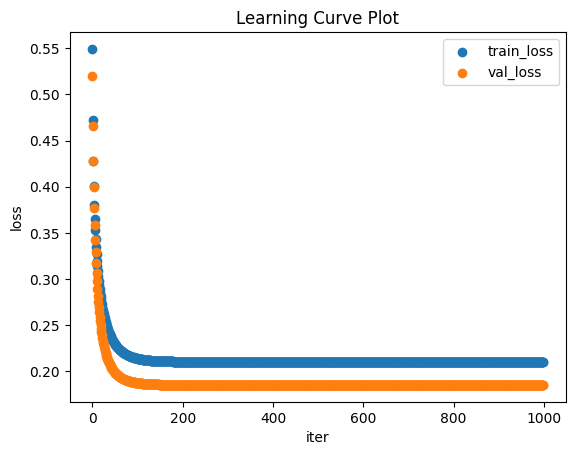

In [ ]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr.iter), slr.loss, label='train_loss')
plt.scatter(range(slr.iter), slr.val_loss, label='val_loss')
plt.legend()
plt.show()

> ### [Problem 7] Visualization of Decision Area
---

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary Classification with two-dimensional features.
    The background color is drawn from estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : Object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculatethe estimate
    title : str
        Give the text of the graph title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names : list of str
        Give a list of legend
    """
    # Settings
    scatter_color = ['green', 'purple']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, color='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

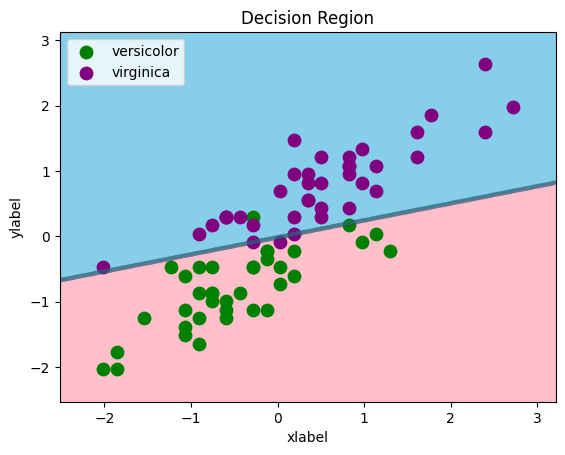

In [ ]:
decision_region(X_train_scaled, y_train, slr2) # Scratch (C=0.1)

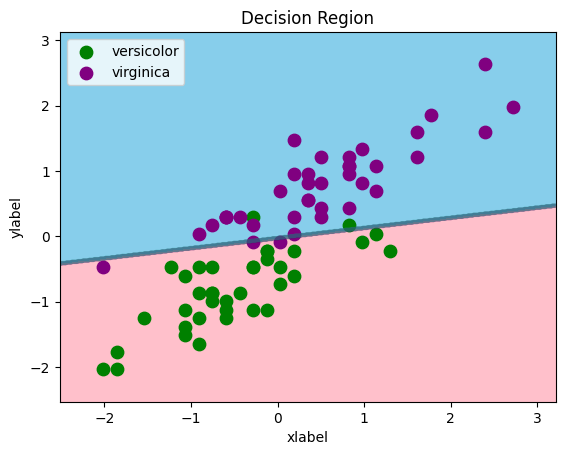

In [ ]:
decision_region(X_train_scaled, y_train, slr) # Scratch (C=1)

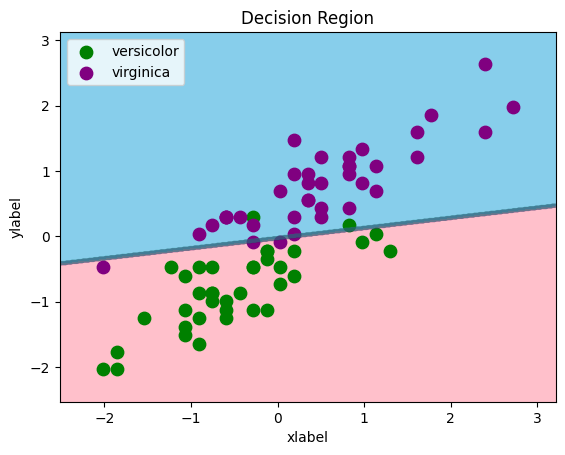

In [ ]:
decision_region(X_train_scaled, y_train, lr) # Sklearn

> ### [Problem 8] (Advanced) Saving weights

In [ ]:
"Code using in ScratchLogisticRgression for save value theta"
#np.save('theta', self.theta)

In [ ]:
np.load('theta.npy')

array([ 0.08021682, -1.68908382,  6.4745267 ])